In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import random as rn
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Random control

In [4]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

## Create a dataset

Global variables

In [8]:
data_dir = '/content/drive/MyDrive/ProjectData/Train'

batch_size = 32
img_height = 64
img_width = 64

Training set

In [9]:
# обучающая выборка
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 37384 files belonging to 6 classes.
Using 26169 files for training.


Validation set

In [10]:
# валидационная выборка
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 37384 files belonging to 6 classes.
Using 11215 files for validation.


## Visualize the data

In [ ]:
class_names = train_ds.class_names

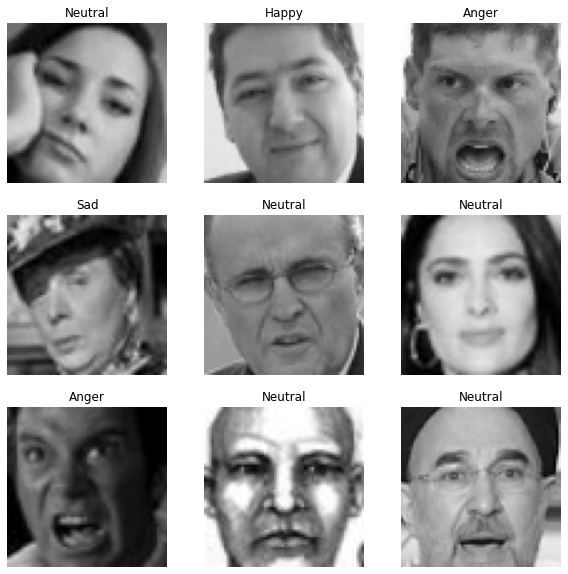

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap='gray', vmin=0, vmax=255)
    plt.title(class_names[labels[i]])
    plt.axis("off")

Train a model using these datasets by passing them to `model.fit` in a moment.

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


# Create the model

In [ ]:
num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Conv2D(256, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),

  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model

In [ ]:
model.compile(  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,name='Adam'),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = 'accuracy'
            )

Early stop

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0001, patience=5, verbose=1,
    #mode='auto', baseline=None, 
    restore_best_weights=False
)

## Model summary

View all the layers of the network using the model's `summary` method:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       7

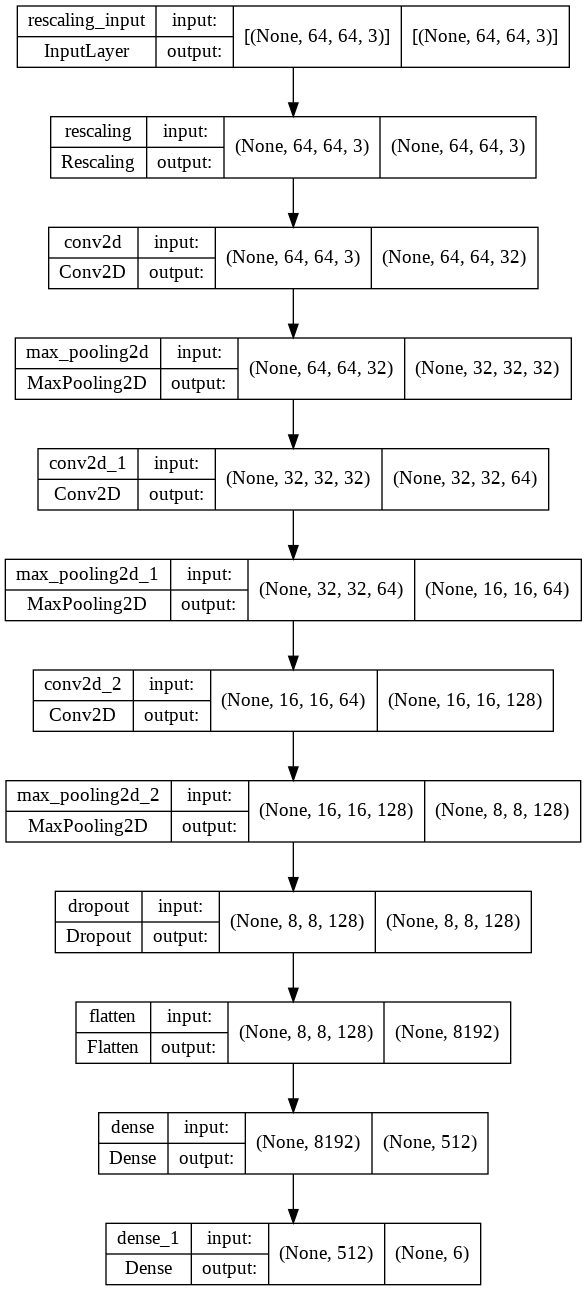

In [26]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

## Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callback]
)

Epoch 1/20
818/818 [==============================] - 52s 59ms/step - loss: 1.3324 - accuracy: 0.4845 - val_loss: 1.1299 - val_accuracy: 0.5889
Epoch 2/20
818/818 [==============================] - 49s 60ms/step - loss: 1.0902 - accuracy: 0.6016 - val_loss: 1.0237 - val_accuracy: 0.6216
Epoch 3/20
818/818 [==============================] - 49s 60ms/step - loss: 0.9955 - accuracy: 0.6308 - val_loss: 0.9488 - val_accuracy: 0.6471
Epoch 4/20
818/818 [==============================] - 49s 60ms/step - loss: 0.9387 - accuracy: 0.6493 - val_loss: 0.9076 - val_accuracy: 0.6646
Epoch 5/20
818/818 [==============================] - 50s 60ms/step - loss: 0.8884 - accuracy: 0.6703 - val_loss: 0.8769 - val_accuracy: 0.6738
Epoch 6/20
818/818 [==============================] - 49s 60ms/step - loss: 0.8466 - accuracy: 0.6871 - val_loss: 0.8490 - val_accuracy: 0.6883
Epoch 7/20
818/818 [==============================] - 49s 60ms/step - loss: 0.8108 - accuracy: 0.7013 - val_loss: 0.8154 - val_accuracy:

## Visualize training results

Model results

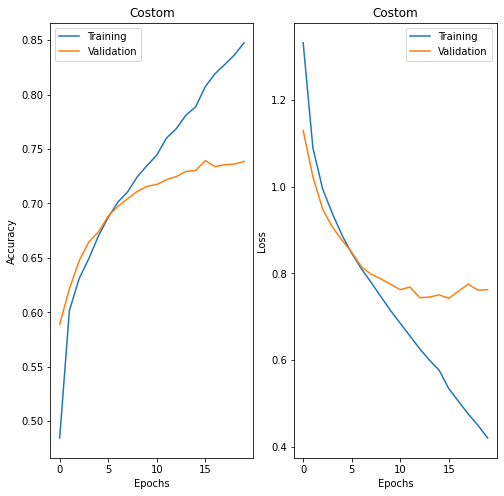

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='upper left')
plt.title('Costom')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('Costom')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Saving the model train

In [ ]:
model.save('/content/drive/MyDrive/ProjectData/CNN_Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ProjectData/CNN_Model/assets


In [16]:
model = tf.keras.models.load_model('/content/drive/MyDrive/ProjectData/CNN_Model')

### Check on test dataset

In [17]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/ProjectData/Test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4136 files belonging to 6 classes.


Model accuracy on test set

In [18]:
test_loss, test_acc = model.evaluate(test_ds)
print(test_loss, test_acc)

130/130 [==============================] - 699s 5s/step - loss: 0.9142 - accuracy: 0.6779
0.9141932129859924 0.6779497265815735


In [19]:
predictions = np.array([])
labels =  np.array([])
scores = np.array([])

In [20]:
for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=1)])
  labels = np.concatenate([labels, y.numpy()])
  scores = np.concatenate([scores, model.predict(x)[:, 1]])

In [21]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(labels,predictions)
print(cf_matrix)

[[ 144    0   40   53   34   29]
 [  17   30   12   14   19    7]
 [  30    0 1121   66   80   53]
 [  36    0  149  848  222   47]
 [  35    3   74  189  307   29]
 [  11    0   32   31   20  354]]


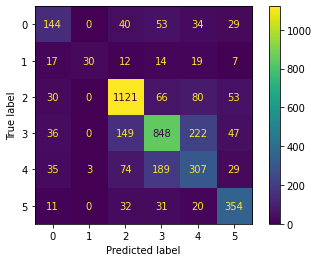

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm_display = ConfusionMatrixDisplay(cf_matrix).plot()

In [23]:
# тестовая выборка друзья 
test_ds_friends = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/ProjectData/callibration_images',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32 files belonging to 5 classes.
